# Trolley study

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('../python/matplotlib/styles/single_plot.mplstyle')

Reading in the measurements into a `pandas.DataFrame`

In [3]:
df = pd.read_csv('../data/measurements.dat', delim_whitespace=True)

In [4]:
df

,category,ot1,ot2,ot3,ot4,ot5,nt1,nt2,nt3,nt4,nt5,Order,ot_sum,nt_sum
0,Band 7,30.39,12.22,44.23,15.50,34.09,34.00,34.50,43.38,10.93,5.89,New trolley 1.,136.43,128.70
1,Band 4,44.30,19.17,60.00,9.11,8.42,17.91,25.77,55.48,6.02,9.93,New trolley 1.,141.00,115.11
2,Band 4,46.89,23.54,40.11,14.64,37.57,16.82,10.52,18.96,10.75,9.06,Old trolley 1.,162.75,66.11
3,Band 5,16.86,14.78,41.82,6.01,28.54,22.56,18.16,8.00,7.73,9.80,New trolley 1.,108.01,66.25
4,Band 5,17.67,15.98,38.53,4.35,36.78,13.00,20.80,4.59,4.60,10.29,Old trolley 1.,113.31,53.28
5,Band 5,18.84,33.64,23.90,5.19,37.22,16.29,5.70,9.00,6.80,7.23,Old trolley 1.,118.79,45.02
6,SHO Dr,58.97,23.13,7.96,3.53,17.88,24.77,4.36,6.49,3.96,6.66,Old trolley 1.,111.47,46.24
7,Band 6,22.06,19.48,22.28,7.72,16.35,14.70,21.07,20.81,8.76,16.59,New trolley 1.,87.89,81.93
8,Band 5,16.01,20.98,31.87,7.25,22.43,19.26,13.27,5.95,10.93,5.38,Old trolley 1.,98.54,54.79
9,Consult.,39.02,12.50,25.15,14.81,12.82,23.31,6.12,5.39,4.32,6.50,Old trolley 1.,104.30,45.64


- `ot` = old trolley 
- `nt` = new trolley
- `1,2,3,4,5`: drawer index
- `Order`: which trolley was first
- `ot_sum`: sum of times on the old trolley
- `nt_sum`: sum of times on the new trolley

Separating people who started on the new trolley and those who started on the old trolley.

In [5]:
first_new = df.query("Order == 'New trolley 1.'")
first_old = df.query("Order == 'Old trolley 1.'")

In [6]:
len(first_new)

5

In [7]:
len(first_old)

14

There are
- 5 people who started on the new trolley
- 14 people who started on the old trolley

In order to account for the effect of improving the time on the second trolley in the statistical test, the number of of people who started on the new trolley and those who started on the trolley should be equal.

Unfortunately, since these number of people in these categories is imbalanced (5 starting on the new vs. 14 on the old), we have to pair 5 at a time.

## Total drawer times

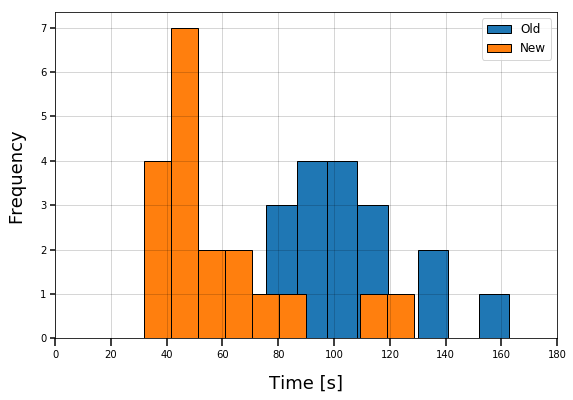

In [8]:
f,a = plt.subplots()
df['ot_sum'].plot.hist(color='C0',edgecolor='k',ax=a, label='Old')
df['nt_sum'].plot.hist(color='C1',edgecolor='k',ax=a, label='New')
a.set_xlabel('Time [s]')
a.set_xlim(0.0, 180)
a.legend()

## Statistical test

### Welch's $t$-test

**References:**
- https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances
- https://en.wikipedia.org/wiki/Welch%27s_t-test
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html

In [9]:
old_trolley_batch1 = np.append(first_new['ot_sum'].values, first_old[0:5]['ot_sum'].values)
new_trolley_batch1 = np.append(first_new['nt_sum'].values, first_old[0:5]['nt_sum'].values)

old_trolley_batch2 = np.append(first_new['ot_sum'].values, first_old[5:10]['ot_sum'].values)
new_trolley_batch2 = np.append(first_new['nt_sum'].values, first_old[5:10]['nt_sum'].values)

old_trolley_batch3 = np.append(first_new['ot_sum'].values, first_old[-6:-1]['ot_sum'].values)
new_trolley_batch3 = np.append(first_new['nt_sum'].values, first_old[-6:-1]['nt_sum'].values)

In [10]:
batches = [(old_trolley_batch1, new_trolley_batch1),
           (old_trolley_batch2, new_trolley_batch2),
           (old_trolley_batch3, new_trolley_batch3)]

Plotting functions

In [11]:
def show_histogram(old_trolley_times, new_trolley_times):
    
    f,a = plt.subplots()
    a.hist(old_trolley_times, color='C0', label='Old trolley', range=(0.0, 180.0), bins=90)
    a.hist(new_trolley_times, color='C1', label='New trolley', range=(0.0, 180.0), bins=90)
    
    t,pval =scipy.stats.ttest_ind(old_trolley_times, new_trolley_times, equal_var=False)
    title = r"$t= {:.3f}$, $p$-value = {:.4f}".format(t, pval)
    
    a.set_xlabel('Total time [s]')
    a.set_ylabel('Frequency')
    
    a.set_title(title)
    a.legend()
    
    return f,a, t,pval

In [12]:
def show_scatter(old_trolley_times, new_trolley_times):
    
    f,a = plt.subplots()
    
    nsize = len(old_trolley_times)
    
    x1 = np.random.uniform(0.0, 0.4, size=nsize)
    x2 = np.random.uniform(0.6, 1.0, size=nsize)
    
    a.scatter(x1, new_trolley_times, color='C1', label='New trolley')
    a.scatter(x2, old_trolley_times, color='C0', label='Old trolley')
    
    t,pval = scipy.stats.ttest_ind(old_trolley_times, new_trolley_times, equal_var=False)
    title = r"$t= {:.3f}$, $p$-value = {:.4f}".format(t, pval)
    
    a.set_ylabel('Total time [s]')
    a.set_xlabel('')
    
    #a.set_title(title)
    a.legend()
    
    return f,a, t,pval

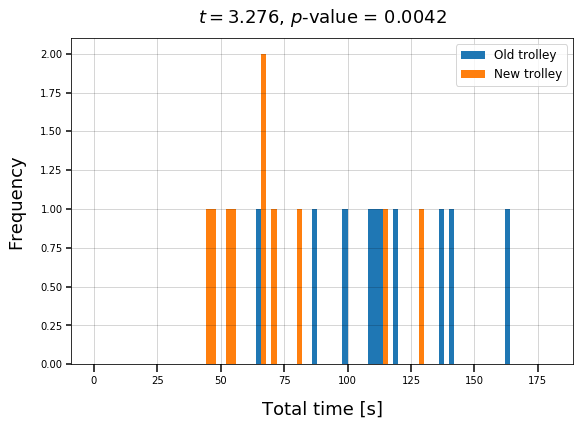

In [13]:
f,a,t,pval = show_histogram(old_trolley_batch1, new_trolley_batch1)
f.savefig('../figures/histogram_first_batch_5_first_old_5_first_new.pdf', bbox_inches='tight')
f.savefig('../figures/histogram_first_batch_5_first_old_5_first_new.png', bbox_inches='tight')

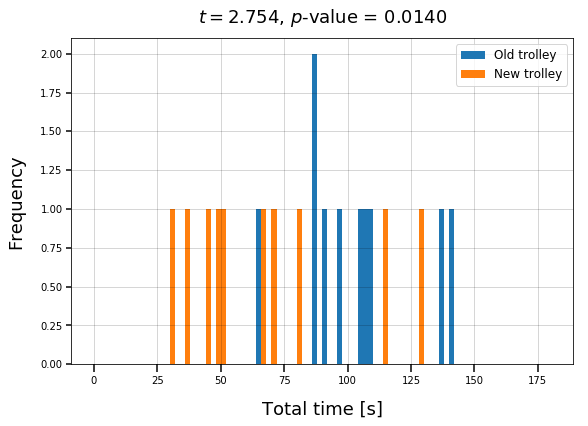

In [14]:
f,a,t,pval = show_histogram(old_trolley_batch2, new_trolley_batch2)

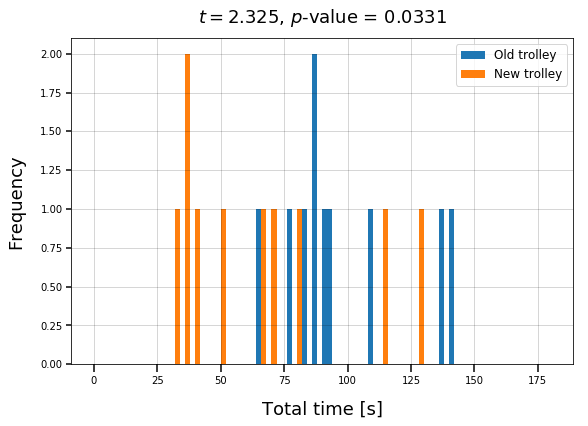

In [15]:
f,a,t,pval = show_histogram(old_trolley_batch3, new_trolley_batch3)

Scatter plot

(<Figure size 648x432 with 1 Axes>,
 3.2762730476121953,
 0.0041959828588124118)

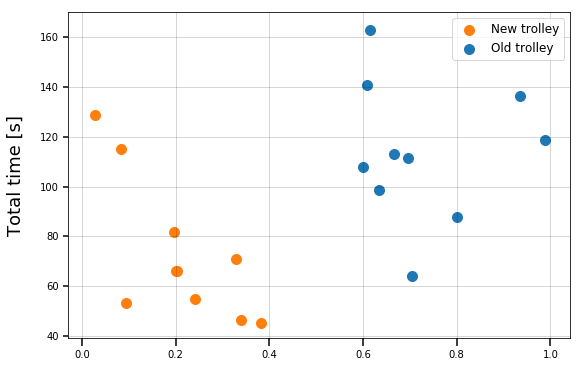

In [16]:
show_scatter(old_trolley_batch1, new_trolley_batch1)

Violin plot

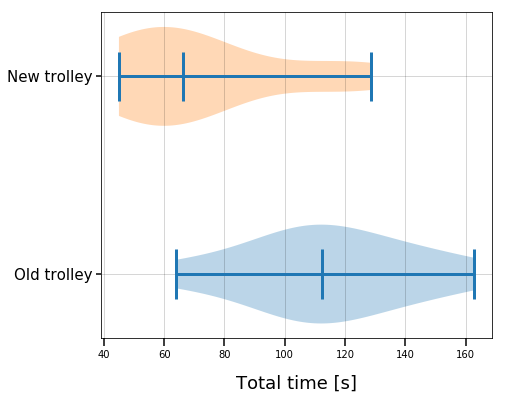

In [17]:
f,a = plt.subplots(ncols=1, figsize=(7,6))
violins1 = a.violinplot((old_trolley_batch1, new_trolley_batch1), vert=False, showmedians=True)

violins1['bodies'][0].set_facecolor('C0')
violins1['bodies'][1].set_facecolor('C1')

a.set_yticks((1.0, 2.0))
a.set_yticklabels(('Old trolley', 'New trolley'), fontsize=15)
a.set_xlabel('Total time [s]')
f.savefig('../figures/violin_plot_first_batch_5_first_old_5_first_new.pdf', bbox_inches='tight')
f.savefig('../figures/violin_plot_first_batch_5_first_old_5_first_new.png', bbox_inches='tight')

Text(0,0.5,'Total time [s]')

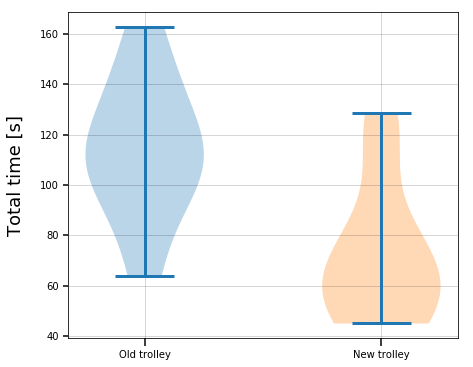

In [18]:
f,a = plt.subplots(ncols=1, figsize=(7,6))
violins1 = a.violinplot((old_trolley_batch1, new_trolley_batch1), (1.0, 2.0))

violins1['bodies'][0].set_facecolor('C0')
violins1['bodies'][1].set_facecolor('C1')

a.set_xticks((1.0, 2.0))
a.set_xticklabels(('Old trolley', 'New trolley'))
a.set_ylabel('Total time [s]')

Text(0,0.5,'Total time [s]')

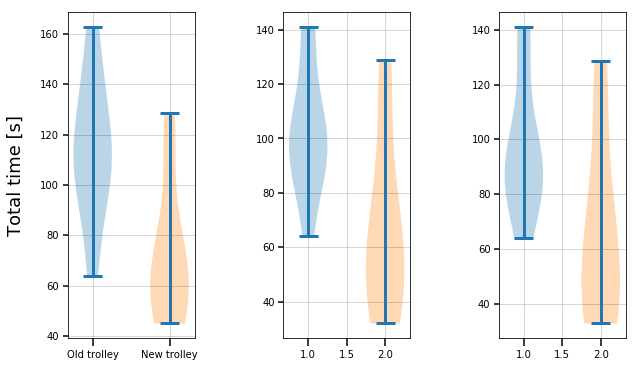

In [19]:
f,axes = plt.subplots(ncols=3, figsize=(10,6))
a = axes.flatten()
violins1 = a[0].violinplot((old_trolley_batch1, new_trolley_batch1), (1.0, 2.0))
violins2 = a[1].violinplot((old_trolley_batch2, new_trolley_batch2), (1.0, 2.0))
violins3 = a[2].violinplot((old_trolley_batch3, new_trolley_batch3), (1.0, 2.0))

violins1['bodies'][0].set_facecolor('C0')
violins1['bodies'][1].set_facecolor('C1')

violins2['bodies'][0].set_facecolor('C0')
violins2['bodies'][1].set_facecolor('C1')

violins3['bodies'][0].set_facecolor('C0')
violins3['bodies'][1].set_facecolor('C1')

a[0].set_xticks((1.0, 2.0))
a[0].set_xticklabels(('Old trolley', 'New trolley'))
a[0].set_ylabel('Total time [s]')


### Detailed derivation on first batch to cross-check `scipy.stats.ttest_ind()`

In [20]:
x1 = old_trolley_batch1
x2 = new_trolley_batch1

In [21]:
n1 = len(x1)
n2 = len(x2)

Mean

In [22]:
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
x1_mean, x2_mean

(114.22499999999999, 72.840000000000003)

In [23]:
x1_mean - x2_mean

41.384999999999991

In [24]:
(x1_mean - x2_mean)/5

8.2769999999999975

Median

In [25]:
x1_median = np.median(old_trolley_batch1)
x2_median = np.median(new_trolley_batch1)
x1_median, x2_median

(112.38999999999999, 66.180000000000007)

In [26]:
x1_median - x2_median

46.20999999999998

In [27]:
(x1_median - x2_median)/5

9.2419999999999956

Sample variance

In [28]:
x1_var = np.var(x1, ddof=1)
x2_var = np.var(x2, ddof=1)
x1_var, x2_var

(787.62329444444413, 807.98299999999972)

Test statistic

In [29]:
t = (x1_mean - x2_mean)/np.sqrt( (x1_var/n1) + (x2_var/n2))

In [30]:
t

3.2762730476121953

In [31]:
nu = ((x1_var/n1) + (x2_var/n2))**2/( (x1_var**2)/(n1**2 * (n1-1) ) + (x2_var**2)/(n2**2 * (n2-1) ) )
nu

17.997069826706664

In [32]:
p_value = 1 - scipy.stats.t.cdf(t, df=nu)
p_value

0.002097991429406143

-----

### First trolley new vs. old

Text(0.5,1,'First: old')

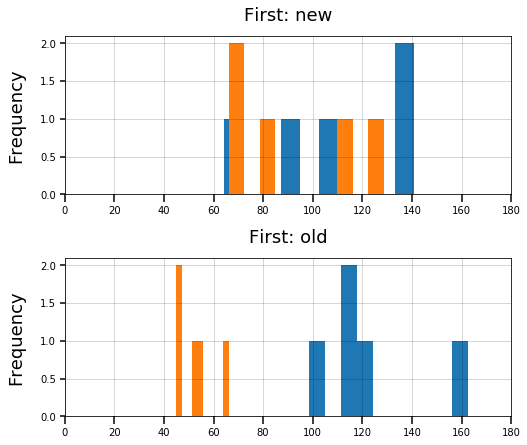

In [33]:
f,a = plt.subplots(nrows=2, figsize=(8,7))
a = a.flatten()
first_new['ot_sum'].plot.hist(ax=a[0], color='C0')
first_new['nt_sum'].plot.hist(ax=a[0], color='C1')

first_old[0:5]['ot_sum'].plot.hist(ax=a[1], color='C0')
first_old[0:5]['nt_sum'].plot.hist(ax=a[1], color='C1')

a[0].set_xlim(0.0, 180)
a[1].set_xlim(0.0, 180)

a[0].set_title('First: new')
a[1].set_title('First: old')

## Per drawer

In [34]:
ndrawers = 5

Text(0.5,1,'First old')

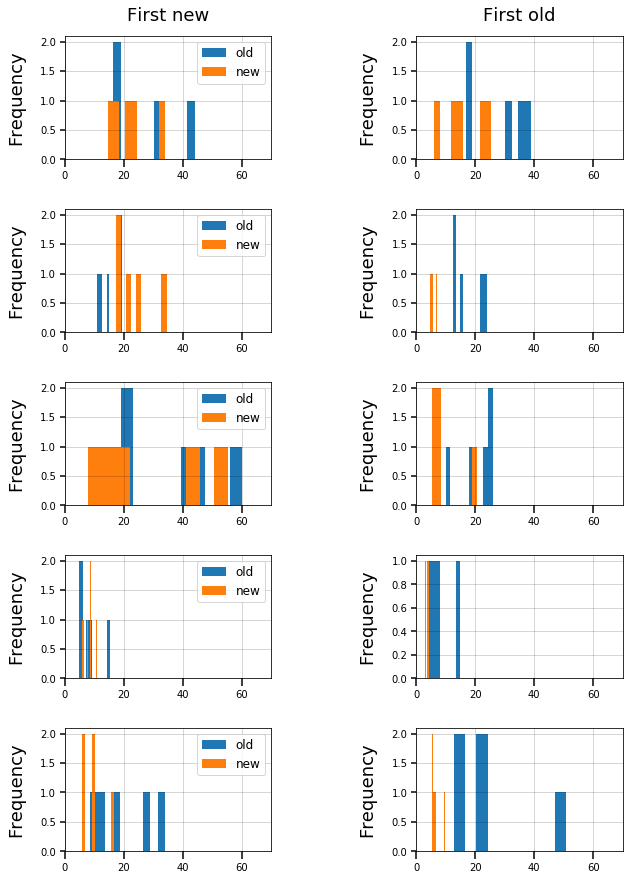

In [35]:
f,a = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
#a = a.flatten()
for i in range(1,ndrawers+1):
    
    drawer_old_str = "ot{}".format(i) 
    drawer_new_str = "nt{}".format(i)
    
    first_new[drawer_old_str].plot.hist(color="C0", ax=a[i-1][0], label='old')
    first_new[drawer_new_str].plot.hist(color="C1", ax=a[i-1][0], label='new')

    first_old[5:10][drawer_old_str].plot.hist(color="C0", ax=a[i-1][1], label='old')
    first_old[5:10][drawer_new_str].plot.hist(color="C1", ax=a[i-1][1], label='new')
    
    a[i-1][0].set_xlim(0.0, 70)
    a[i-1][1].set_xlim(0.0, 70)
    a[i-1][0].legend()
    
a[0][0].set_title("First new")
a[0][1].set_title("First old")